<a href="https://colab.research.google.com/github/rajeevfromkrec/time-series/blob/master/ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA.git

Cloning into 'ARIMA-And-Seasonal-ARIMA'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [2]:
!ls

ARIMA-And-Seasonal-ARIMA  sample_data


In [3]:
import os

In [4]:
os.listdir('ARIMA-And-Seasonal-ARIMA')

['README.md', '.git', 'Untitled.ipynb', 'perrin-freres-monthly-champagne-.csv']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data= pd.read_csv('ARIMA-And-Seasonal-ARIMA/perrin-freres-monthly-champagne-.csv')

In [7]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [8]:
data.columns=['month', 'sales']

In [9]:
data.head()

,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [10]:
data.tail()

,month,sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [12]:
data.drop(index=[105,106],axis=0,inplace=True)

In [13]:
data.tail()

,month,sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [14]:
data.set_index('month', inplace=True)

In [15]:
data.head()

,sales
month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0


In [19]:
data=data.reset_index()
data.head()


,month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [20]:
data['month']=pd.to_datetime(data['month'])
data.set_index('month',inplace=True)

In [21]:
data.head()

,sales
month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


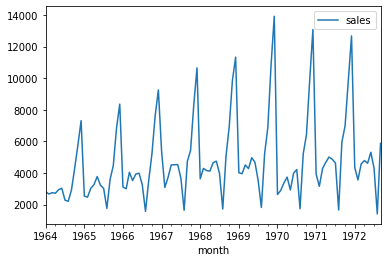

In [22]:
data.plot()

In [24]:
#testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [30]:
# nullh- Data is non stationary
# alternate H data is stationary

def addfuller_test(sales):
  result= adfuller(sales)
  labels= ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

  for label, value in zip(labels,result):
    print(label +'::'+str(value))

  if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [31]:
addfuller_test(data['sales'])

ADF Test Statistic::-1.8335930563276193
p-value::0.36391577166024686
#Lags Used::11
Number of Observations Used::93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
data['sales_first_diff']= data['sales']-data['sales'].shift(1)

In [34]:
data['sales'].shift(1)[:10]

month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
1964-06-01    2946.0
1964-07-01    3036.0
1964-08-01    2282.0
1964-09-01    2212.0
1964-10-01    2922.0
Name: sales, dtype: float64

In [35]:
data['seasonal_first_difference']=data['sales']-data['sales'].shift(12)

In [36]:
data.head(20)

,sales,sales_first_diff,seasonal_first_difference
month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [37]:
addfuller_test(data['seasonal_first_difference'].dropna())

ADF Test Statistic::-7.626619157213166
p-value::2.0605796968136632e-11
#Lags Used::0
Number of Observations Used::92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


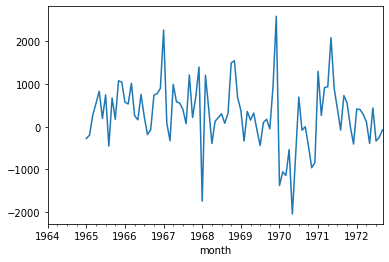

In [38]:
data['seasonal_first_difference'].plot()

In [39]:

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

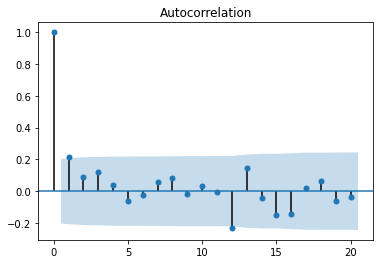

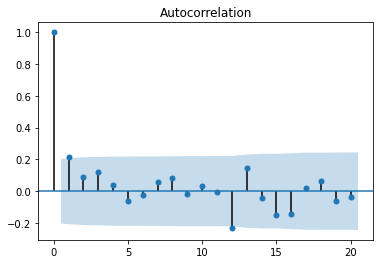

In [40]:
plot_acf(data['seasonal_first_difference'].iloc[13:])

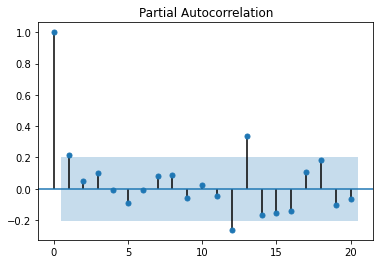

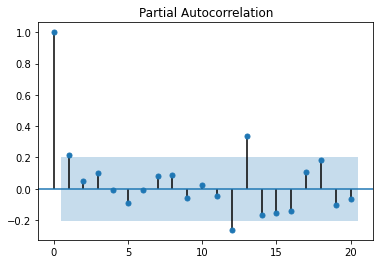

In [41]:
plot_pacf(data['seasonal_first_difference'].iloc[13:])

In [43]:
# for non seasonal data

from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(data['sales'], order=(1,1,1))
model_fit= model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 15 Aug 2020   AIC                           1910.251
Time:                        18:33:42   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.069      -1.529      47.098
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

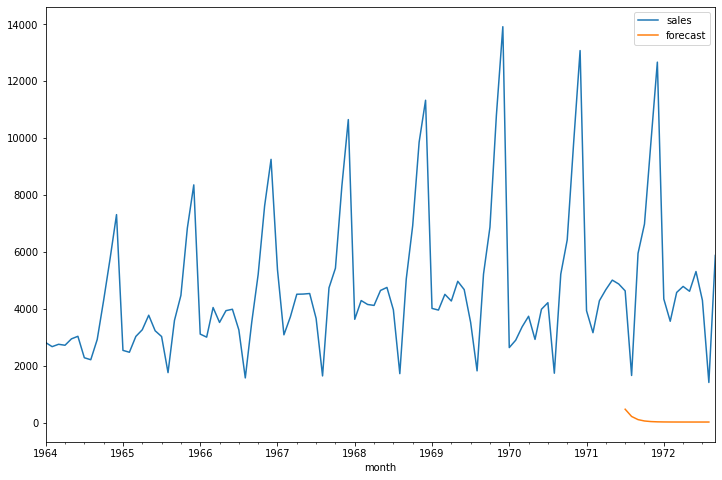

In [47]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['sales','forecast']].plot(figsize=(12,8))

In [49]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


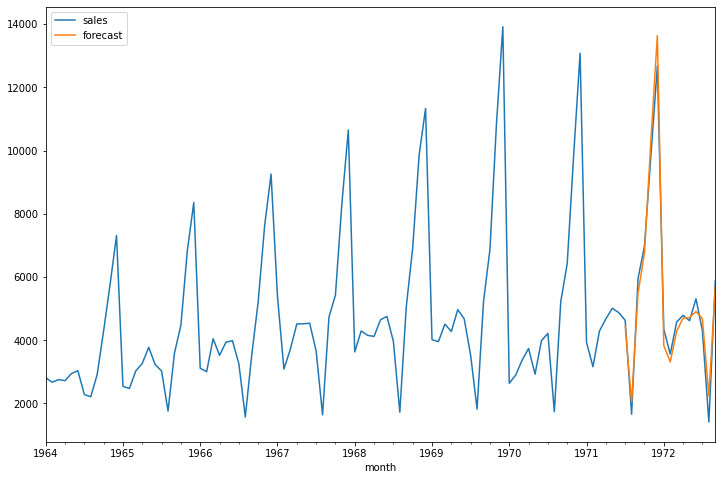

In [51]:
data['forecast']=results.predict(start=90,end=150,dynamic=True)
data[['sales','forecast']].plot(figsize=(12,8))

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [54]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [55]:
future_df=pd.concat([data,future_datest_df])

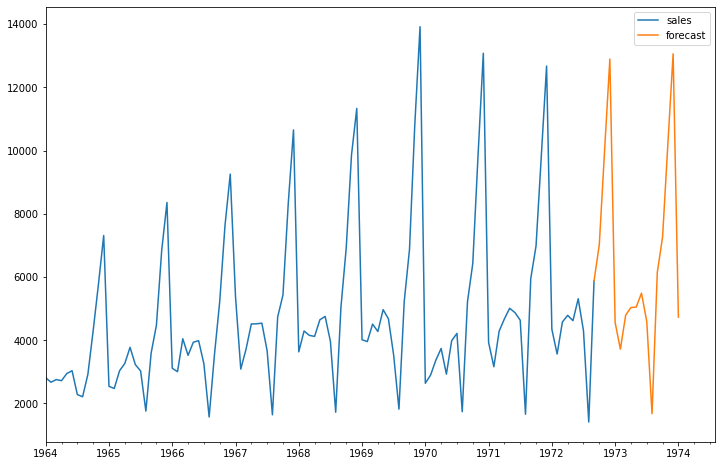

In [57]:

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['sales', 'forecast']].plot(figsize=(12, 8))